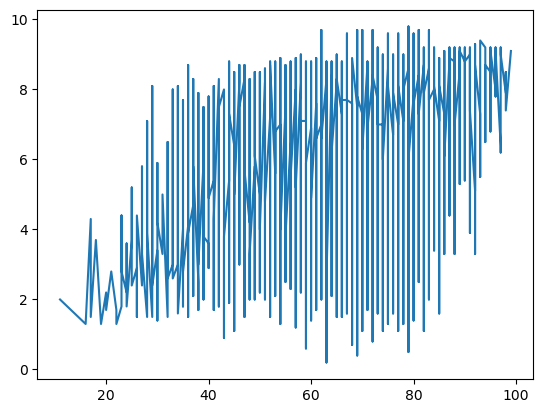

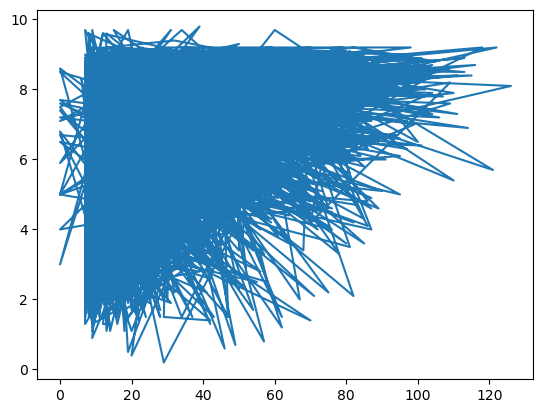

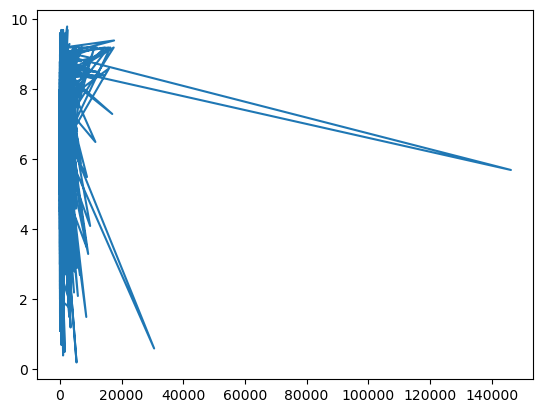

------------test_cost-----------
---POO---
All tests passed!
------------test_gradient-----------
---POO---
All tests passed!
---- Gradient descent POO--- lamb  0
w,b found by gradient descent with labmda 0 ([ 0.71606939  0.08070621 -0.07954303] 6.988604092799393): [-0.02922327 -0.53603036  0.01596796] 6.936385092145706
---- Gradient descent POO--- lamb  1
w,b found by gradient descent with labmda 1 ([ 0.71602344  0.08071275 -0.07953421] 6.988604092799393): [-0.02919274 -0.53586992  0.0159674 ] 6.93639959305445


In [1]:
from public_tests_multi import compute_cost_test, compute_gradient_test
from utils import load_data_csv_multi,zscore_normalize_features,load_data_csv

from LinearRegressionMulti import LinearRegMulti
from LinearRegressionMulti import cost_test_multi_obj
from LinearRegressionMulti import compute_gradient_multi_obj
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def test_gradient(x_train, y_train):
    print("------------test_gradient-----------")
    print("---POO---")
    compute_gradient_test(compute_gradient_multi_obj)


def test_cost(x_train, y_train):
     print("------------test_cost-----------")
     print("---POO---")
     compute_cost_test(cost_test_multi_obj)


def run_gradient_descent(x_train, y_train,alpha = 0.01,iterations=1500,lambda_=0):
    # initialize fitting parameters. Recall that the shape of w is (n,)
    initial_w = np.zeros(x_train.shape[1])
    initial_b = 0.

    print("---- Gradient descent POO--- lamb ",lambda_)
    lr = LinearRegMulti(x_train,y_train,initial_w,initial_b,lambda_)
    w,b,h,w_init,b_init = lr.gradient_descent(alpha,iterations)
    
    return w, b



def test_gradient_descent(x_train, y_train):
    w1, b1 = run_gradient_descent(x_train, y_train,0.01,1500,0)
    print("w,b found by gradient descent with labmda 0 ([ 0.71606939  0.08070621 -0.07954303] 6.988604092799393):", w1, b1)

    w2, b2 = run_gradient_descent(x_train, y_train,0.01,1500,1)
    print("w,b found by gradient descent with labmda 1 ([ 0.71602344  0.08071275 -0.07953421] 6.988604092799393):", w2, b2)

# --EJERCICIO1--
x_train, y_train = load_data_csv_multi("./data/games-data.csv","score","critics","users","user score")
x_train, mu, sigma = zscore_normalize_features(x_train)

# --REPRESENTACIÓN GRÁFICA DE LOS DATOS--
score, user_score = load_data_csv("./data/games-data.csv","score","user score")
users, user_score = load_data_csv("./data/games-data.csv","users","user score")
critics, user_score = load_data_csv("./data/games-data.csv","critics","user score")

score = pd.to_numeric(score, errors="coerce")
mean = score.mean()
np.nan_to_num(score, False, mean)

users = pd.to_numeric(users, errors="coerce")
mean = users.mean()
np.nan_to_num(users, False, mean)

critics = pd.to_numeric(critics, errors="coerce")
mean = critics.mean()
np.nan_to_num(critics, False, mean)

user_score = pd.to_numeric(user_score, errors="coerce")
mean = user_score.mean()
np.nan_to_num(user_score, False, mean)

plt.plot(score, user_score)
plt.show()
plt.plot(critics, user_score)
plt.show()
plt.plot(users, user_score)
plt.show()

# --TESTS--
test_cost(x_train, y_train)
test_gradient(x_train, y_train)
test_gradient_descent(x_train, y_train)
